# Large Population: low *vs* high start mutation probability

The parameters are summarized in the table below (**N = Neutral, S = Selection**):

Parameter  |Low q (N/S)|High q(N/S)|
-----------|---------|------------|
Final size | $10^8$  |   $10^8$   |
**q (start)**  |$10^{-6}$| $10^{-2}$  |
q-factor   | $1$   |   $1$    |  
P(death)   | $0.3$   |   $0.3$    |
Selection  | 0 / 0.3 |  0 / 0.3   |  

In [1]:
from ThesisScripts.MyModel import *
from ThesisScripts.Analyses import *
from ThesisScripts.Visualizations import *
from ThesisScripts.PhyloTree import *

from IPython.display import Image

%matplotlib inline
#matplotlib preamble, taken from http://blog.juliusschulz.de/blog/ultimate-ipython-notebook
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

# Simulations

## Low q (Neutral)

In [2]:
# set seed to get same result for each test simulation
np.random.seed(123)

# Test cell
l = 10**8
q = 10**(-6)
q_fac = 1
alpha = 0.3
sel = 0
low_q_N = Population(l, q, mutfactor=q_fac, death_frac=alpha, selection=sel)
low_q_N.simulate()
print("Total population size:", low_q_N.size)
print("Generations:", low_q_N.gen)
print()
print("Start clone size:", low_q_N.start_clone.size)
print("Number of subclones:", len(low_q_N.clones[1:]))

Total population size: 116402657
Generations: 35

Start clone size: 116401913
Number of subclones: 163


## High q (Neutral)

In [3]:
# set seed to get same result for each test simulation
np.random.seed(123)

# Test cell
l = 10**8
q = 10**(-2)
q_fac = 1
alpha = 0.3
sel = 0
high_q_N = Population(l, q, mutfactor=q_fac, death_frac=alpha, selection=sel)
high_q_N.simulate()
print("Total population size:", high_q_N.size)
print("Generations:", high_q_N.gen)
print()
print("Start clone size:", high_q_N.start_clone.size)
print("Number of subclones:", len(high_q_N.clones[1:]))

Total population size: 116402657
Generations: 35

Start clone size: 95602088
Number of subclones: 1663661


## Low q (Selection)

In [4]:
# set seed to get same result for each test simulation
np.random.seed(123)

# Test cell
l = 10**8
q = 10**(-6)
q_fac = 1
alpha = 0.3
sel = 0.3
low_q_S = Population(l, q, mutfactor=q_fac, death_frac=alpha, selection=sel)
low_q_S.simulate()
print("Total population size:", low_q_S.size)
print("Generations:", low_q_S.gen)
print()
print("Start clone size:", low_q_S.start_clone.size)
print("Number of subclones:", len(low_q_S.clones[1:]))

Total population size: 116402657
Generations: 35

Start clone size: 116389819
Number of subclones: 161


## High q (Selection)

In [5]:
# set seed to get same result for each test simulation
np.random.seed(123)

# Test cell
l = 10**8
q = 10**(-2)
q_fac = 1
alpha = 0.3
sel = 0.3
high_q_S = Population(l, q, mutfactor=q_fac, death_frac=alpha, selection=sel)
high_q_S.simulate()
print("Total population size:", high_q_S.size)
print("Generations:", high_q_S.gen)
print()
print("Start clone size:", high_q_S.start_clone.size)
print("Number of subclones:", len(high_q_S.clones[1:]))

Total population size: 116402657
Generations: 35

Start clone size: 3043
Number of subclones: 1663473


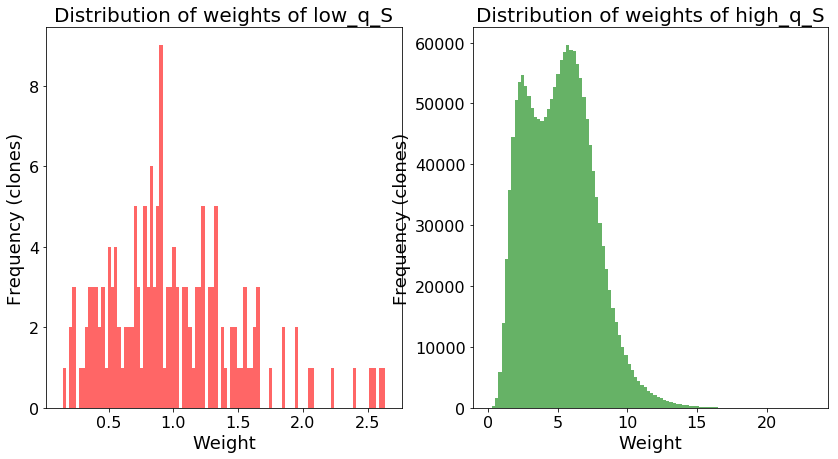

In [6]:
# Check weights of clones for population with selection
low_q_weights = []
for clone in low_q_S.clones:
    low_q_weights.append(clone.weight)

high_q_weights = []
for clone in high_q_S.clones:
    high_q_weights.append(clone.weight)

plt.figure();

plt.subplot(121);
plt.hist(low_q_weights, bins=100, color='r', alpha=0.6);
plt.title("Distribution of weights of low_q_S");
plt.xlabel("Weight");
plt.ylabel("Frequency (clones)");

plt.subplot(122);
plt.hist(high_q_weights, bins=100, color='g', alpha=0.6);
plt.title("Distribution of weights of high_q_S");
plt.xlabel("Weight");
plt.ylabel("Frequency (clones)");

plt.show()

**ALL ANALYSES** are carried out with the detection limit defined below, unless otherwise stated.

In [7]:
detection_limit = 1000

## Evolution of clone family sizes for low_q_N and low_q_S

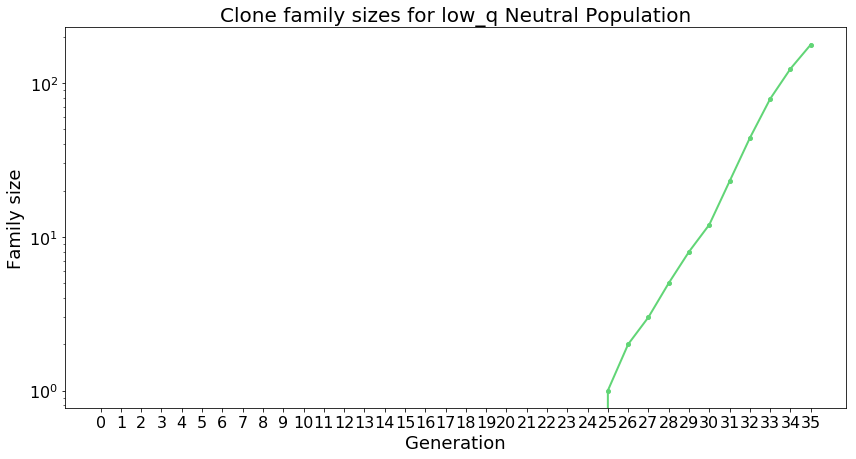

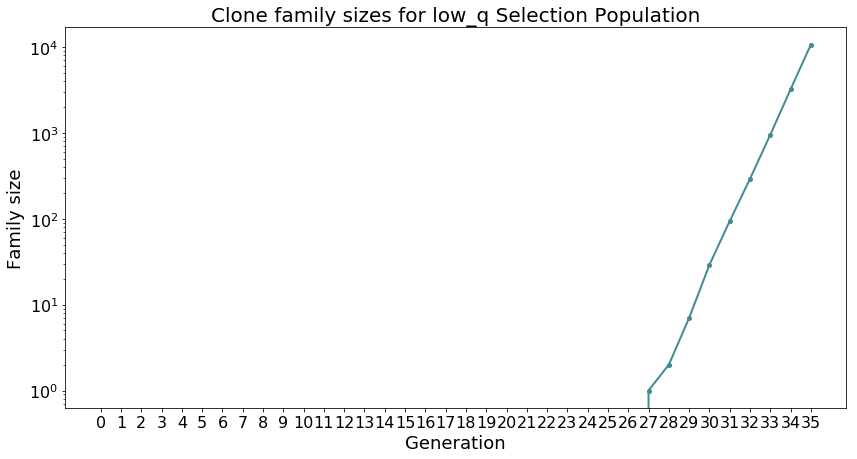

In [8]:
low_q_N_fam_size_plot = family_size_plots(low_q_N, det_lim=100);
plt.title("Clone family sizes for low_q Neutral Population");
plt.yscale('log');
#plt.legend();
plt.savefig("./Figures/Large-Start_mut_rate/low_q_N-fam_size_evo.png");
plt.show();

low_q_S_fam_size_plot = family_size_plots(low_q_S, det_lim=detection_limit);
plt.title("Clone family sizes for low_q Selection Population");
plt.yscale('log');
#plt.legend();
plt.savefig("./Figures/Large-Start_mut_rate/low_q_S-fam_size_evo.png");
plt.show()

## Evolution of clone family sizes for high_q_N and high_q_S

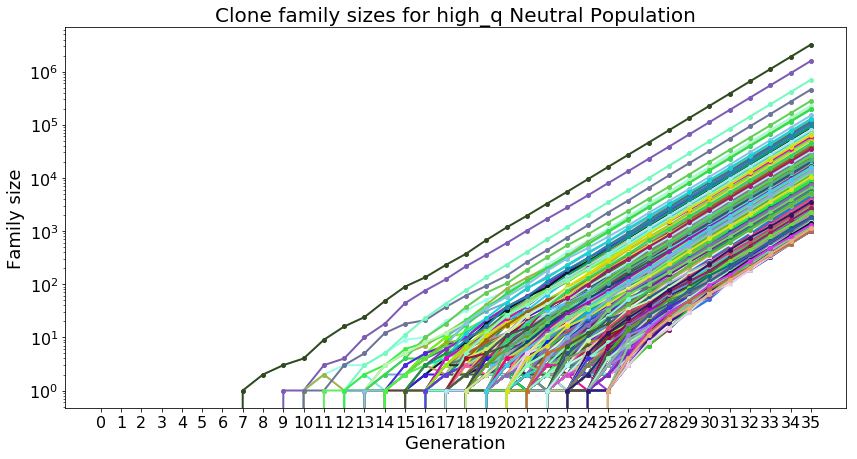

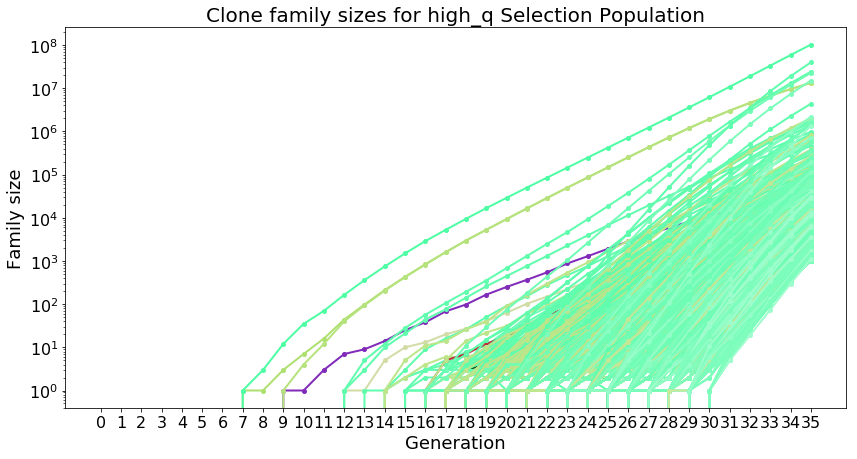

In [9]:
plt.figure()
high_q_N_fam_size_plot = family_size_plots(high_q_N, det_lim=detection_limit);
plt.title("Clone family sizes for high_q Neutral Population");
plt.savefig("./Figures/Large-Start_mut_rate/high_q_N-fam_size_evo.png");
plt.show()

high_q_S_fam_size_plot = family_size_plots(high_q_S, det_lim=detection_limit);
plt.title("Clone family sizes for high_q Selection Population");
plt.savefig("./Figures/Large-Start_mut_rate/high_q_S-fam_size_evo.png");
plt.show()

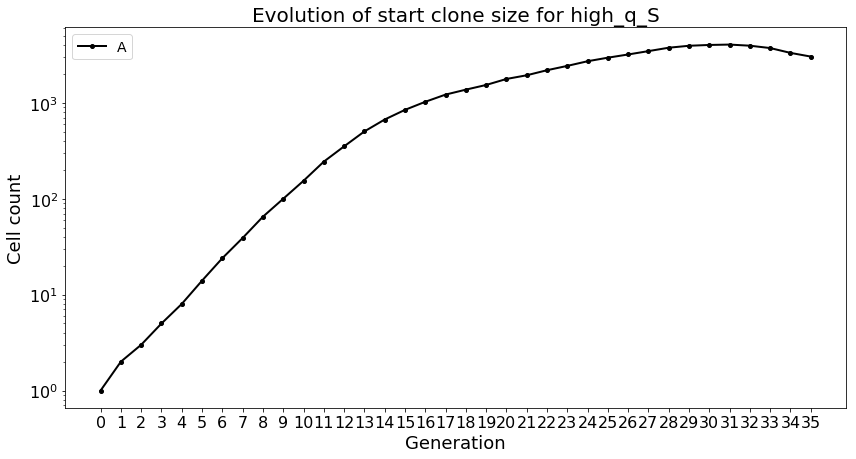

In [10]:
# plotting start clone size evolution for high_q_S
plt.figure();
plt.plot(high_q_S.start_clone.size_vec, marker='.', color='k', label=high_q_S.start_clone.ID);
plt.ylabel("Cell count");
plt.xlabel("Generation");
plt.title("Evolution of start clone size for high_q_S");
plt.legend();
plt.xticks(range(0, high_q_S.gen+1, 1));
plt.yscale('log');
plt.show()

## Phylo tree for low_q Populations


### Neutral

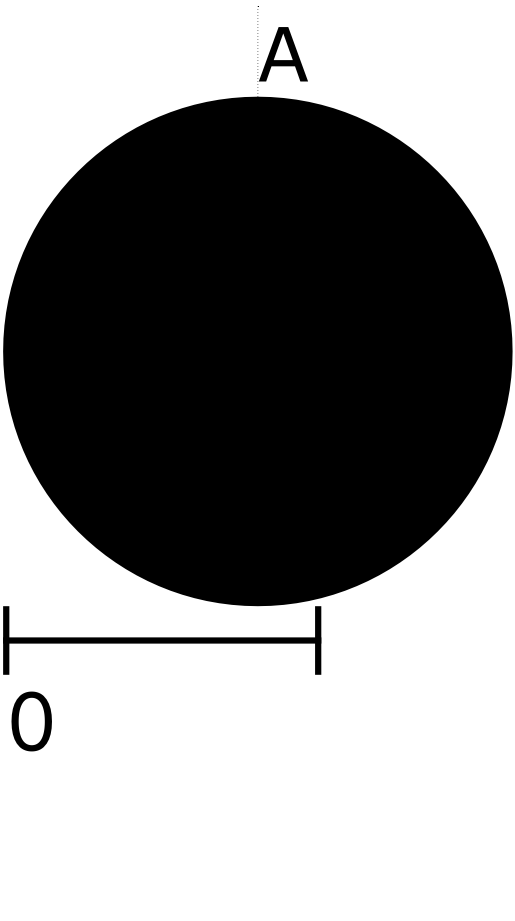

In [11]:
low_q_N_tree, low_q_N_ts = build_tree(low_q_N, det_lim=detection_limit, log=True);
#print(low_q_N_tree)
low_q_N_tree.render("./Figures/Large-Start_mut_rate/low_q_N-tree.png", tree_style=low_q_N_ts, h=260, units='mm');
Image("./Figures/Large-Start_mut_rate/low_q_N-tree.png")

### Selection

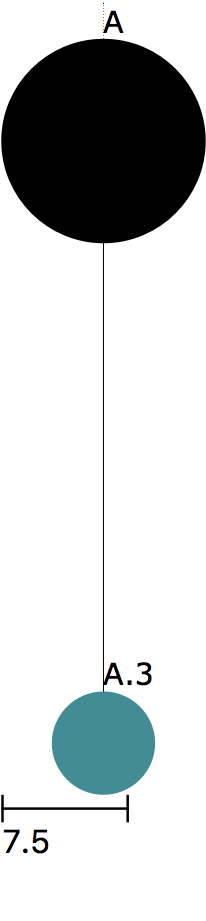

In [12]:
low_q_S_tree, low_q_S_ts = build_tree(low_q_S, det_lim=detection_limit, log=True);
#print(low_q_S_tree)
low_q_S_tree.render("./Figures/Large-Start_mut_rate/low_q_S-tree.png", tree_style=low_q_S_ts, h=260, units='mm');
Image("./Figures/Large-Start_mut_rate/low_q_S-tree.png")

## Phylo tree for high_q populations

For visisbility reasons, the **detection limit** has been increased to **5000** for the phylo trees.

### Neutral

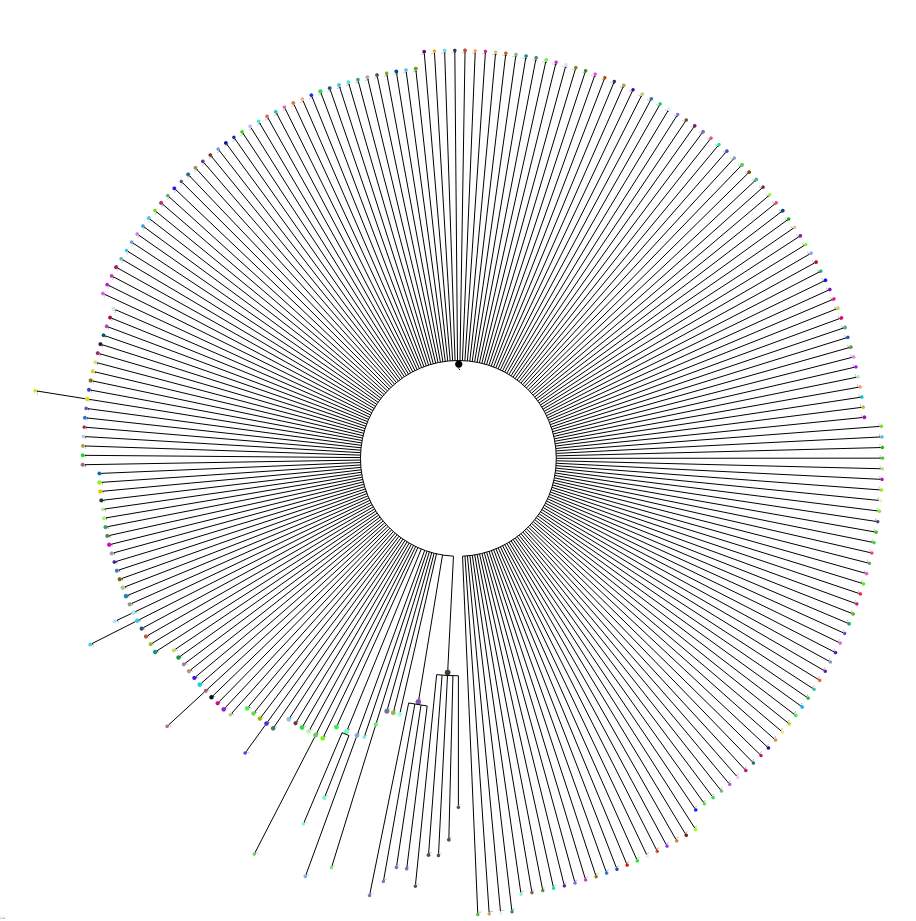

In [13]:
high_q_N_tree, high_q_N_ts = build_tree(high_q_N, det_lim=5000, log=True);
#print(high_q_N_tree)
high_q_N_ts.mode = "c"
high_q_N_tree.render("./Figures/Large-Start_mut_rate/high_q_N-tree.png", tree_style=high_q_N_ts, h=260, units='mm');
Image("./Figures/Large-Start_mut_rate/high_q_N-tree.png")

### Selection

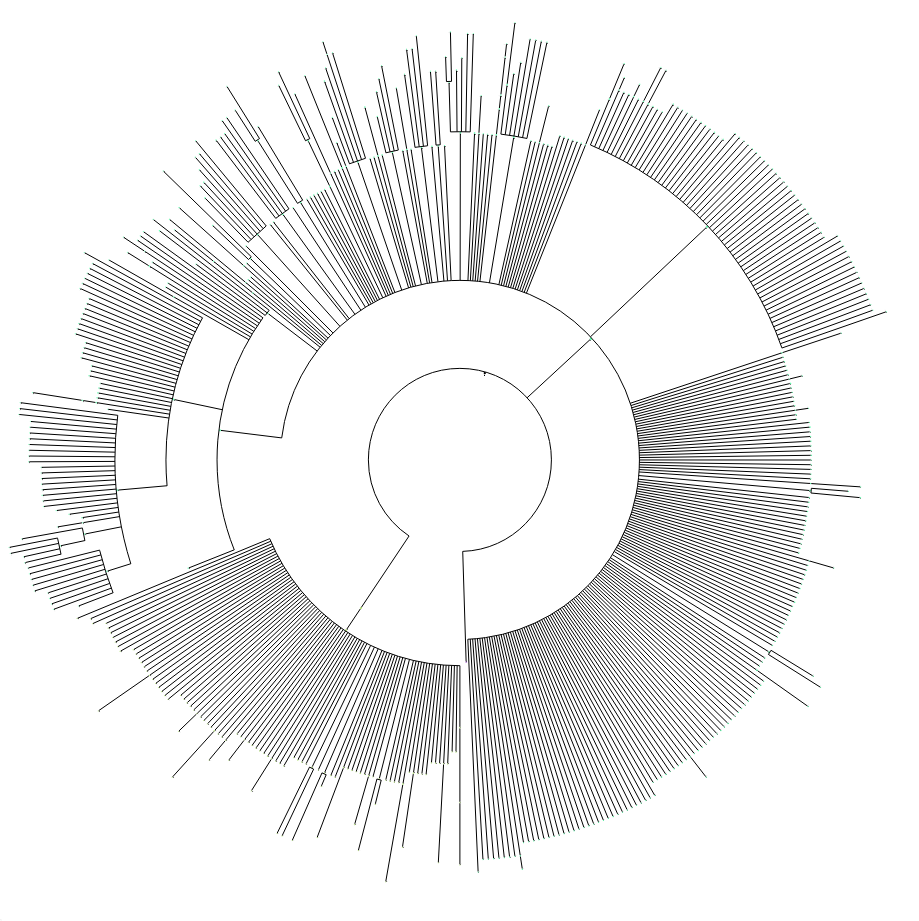

In [14]:
high_q_S_tree, high_q_S_ts = build_tree(high_q_S, det_lim=5000, log=True);
#print(high_q_S_tree)
high_q_S_ts.mode = "c"
high_q_S_tree.render("./Figures/Large-Start_mut_rate/high_q_S-tree.png", tree_style=high_q_S_ts, h=260, units='mm');
Image("./Figures/Large-Start_mut_rate/high_q_S-tree.png")

## Allele frequency spectrum for low_q Populations

### Neutral

**Detection limit** lowered to **100**

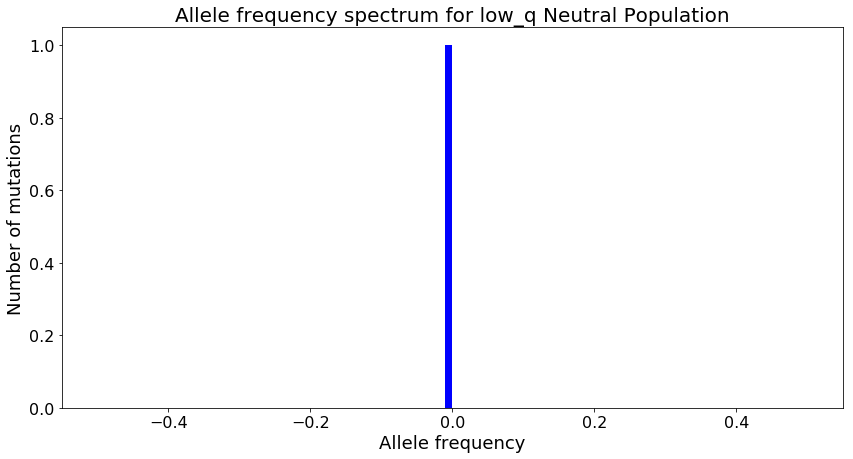

In [15]:
low_q_N_af = allele_freq_spectrum(low_q_N, det_lim=100)
low_q_N_af.iloc[1:].plot(kind='hist', grid=False, logy=False, bins=100, color='b');
plt.ylabel('Number of mutations');
plt.xlabel('Allele frequency');
plt.title('Allele frequency spectrum for low_q Neutral Population');
plt.savefig("./Figures/Large-Start_mut_rate/low_q_N-AF_spec.png");
plt.show()

### Selection
Detection limit lowered to 100

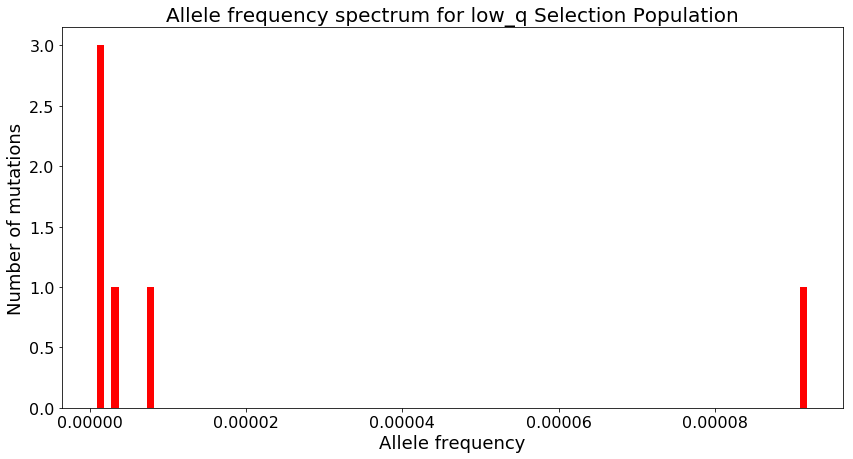

In [16]:
low_q_S_af = allele_freq_spectrum(low_q_S, det_lim=100)
low_q_S_af.iloc[1:].plot(kind='hist', grid=False, logy=False, bins=100, color='r');
plt.ylabel('Number of mutations');
plt.xlabel('Allele frequency');
plt.title('Allele frequency spectrum for low_q Selection Population');
plt.savefig("./Figures/Large-Start_mut_rate/low_q_S-AF_spec.png");
plt.show()

## Allele frequency spectrum for high_q Populations

### Neutral

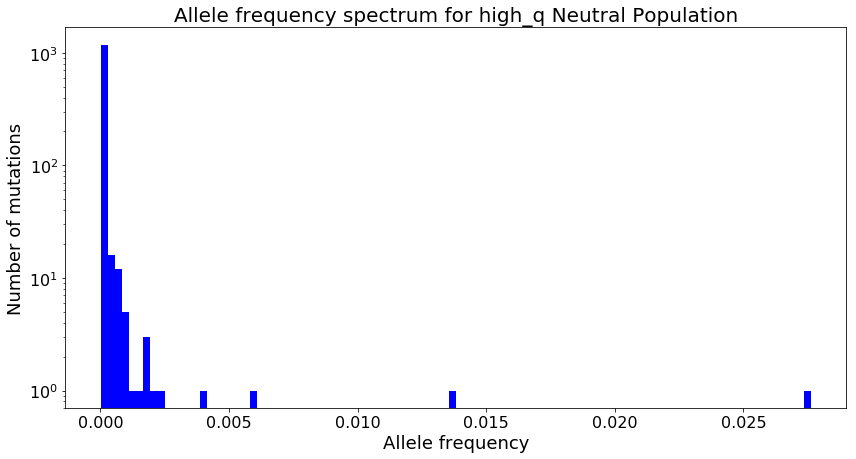

In [17]:
high_q_N_af = allele_freq_spectrum(high_q_N, det_lim=detection_limit)
high_q_N_af.iloc[1:].plot(kind='hist', grid=False, logy=False, bins=100, color='b');
plt.ylabel('Number of mutations');
plt.xlabel('Allele frequency');
plt.title('Allele frequency spectrum for high_q Neutral Population');
plt.yscale('log');
plt.savefig("./Figures/Large-Start_mut_rate/high_q_N-AF_spec.png");
plt.show()

### Selection

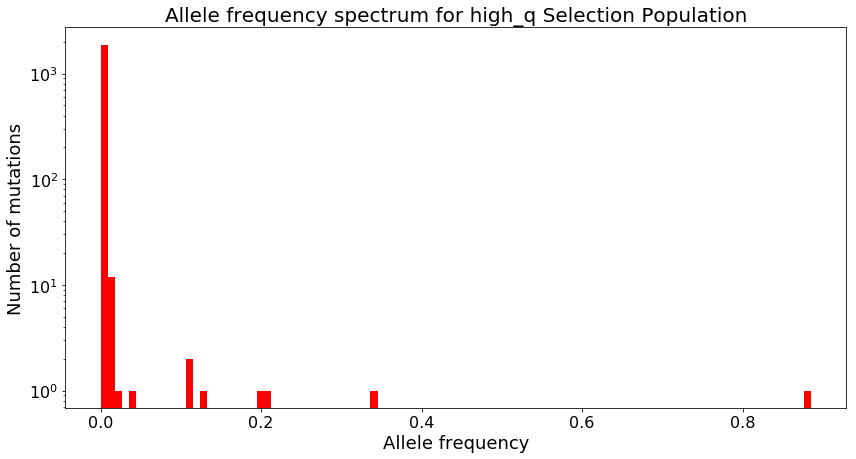

In [18]:
high_q_S_af = allele_freq_spectrum(high_q_S, det_lim=detection_limit)
high_q_S_af.iloc[1:].plot(kind='hist', grid=False, logy=False, bins=100, color='r');
plt.ylabel('Number of mutations');
plt.xlabel('Allele frequency');
plt.title('Allele frequency spectrum for high_q Selection Population');
plt.yscale('log');
plt.savefig("./Figures/Large-Start_mut_rate/high_q_S-AF_spec.png");
plt.show()

## Cumulative number of mutations in function of 1/f

### Low q

In [19]:
fit_low_q_N_af_raw, fit_low_q_N_af_r_value, fit_low_q_N_fig = fit_cumulative_mutations(low_q_N_af)
print("\nR^2 =", fit_low_q_N_af_r_value)
plt.title("Cumulative number of mutations for low_q Neutral population");
plt.savefig("./Figures/Large-Start_mut_rate/low_q_N-Cum_num_M.png");
plt.show()

fit_low_q_S_af_raw, fit_low_q_S_af_r_value, fit_low_q_S_fig = fit_cumulative_mutations(low_q_S_af)
print("\nR^2 =", fit_low_q_S_af_r_value)
plt.title("Cumulative number of mutations for low_q Selection population");
plt.savefig("./Figures/Large-Start_mut_rate/low_q_N-Cum_num_M.png");
plt.show()

/anaconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:106: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/anaconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:116: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/anaconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:118: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)



R^2 = 0.0


ValueError: posx and posy should be finite values

ValueError: posx and posy should be finite values

ValueError: posx and posy should be finite values

### High q populations


R^2 = 0.999886233313


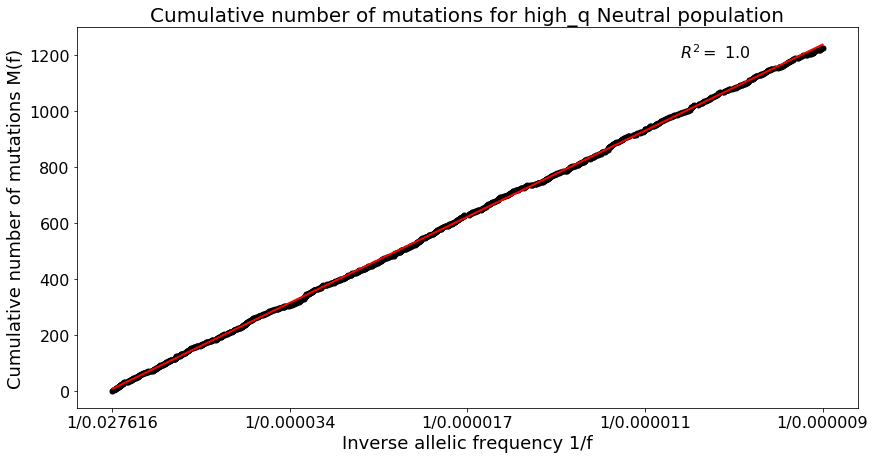


R^2 = 0.996252964307


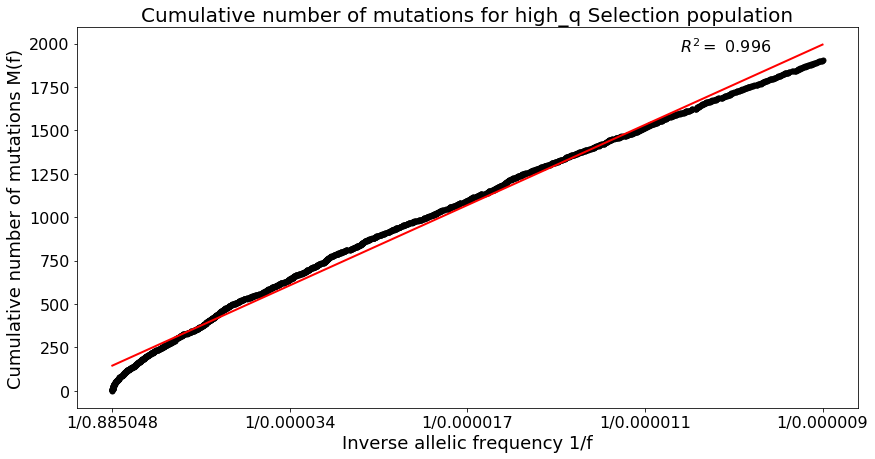

In [20]:
fit_high_q_N_af_raw, fit_high_q_N_af_r_value, fit_high_q_N_fig = fit_cumulative_mutations(high_q_N_af)
print("\nR^2 =", fit_high_q_N_af_r_value)
plt.title("Cumulative number of mutations for high_q Neutral population");
plt.savefig("./Figures/Large-Start_mut_rate/high_q_N-Cum_num_M.png");
plt.show()

fit_high_q_S_af_raw, fit_high_q_S_af_r_value, fit_high_q_S_fig = fit_cumulative_mutations(high_q_S_af)
print("\nR^2 =", fit_high_q_S_af_r_value)
plt.title("Cumulative number of mutations for high_q Selection population");
plt.savefig("./Figures/Large-Start_mut_rate/high_q_S-Cum_num_M.png");
plt.show()

## Distribution of number of mutations for all Populations

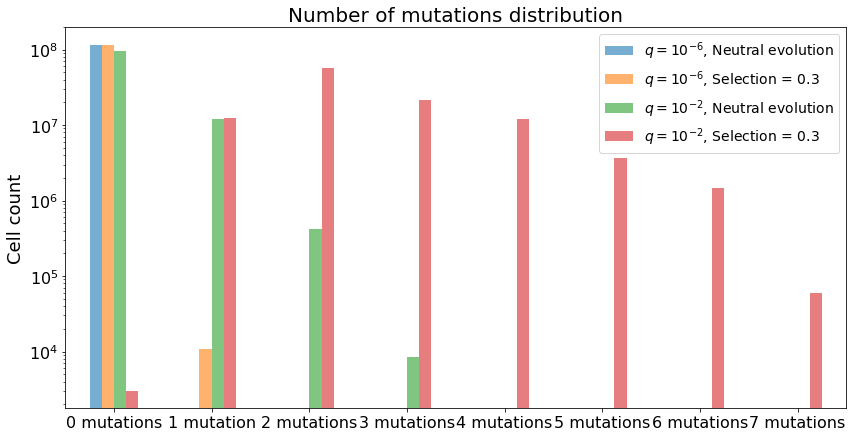

In [21]:
low_q_N_num_mut_df = num_mutations_distribution(low_q_N, det_lim=detection_limit)
low_q_N_num_mut_df.columns = [r"$q = 10^{-6}$, Neutral evolution"]
#low_q_N_num_mut_df.plot(kind='bar', logy=True, legend=True, rot=0, color='b', alpha=0.6);

low_q_S_num_mut_df = num_mutations_distribution(low_q_S, det_lim=detection_limit)
low_q_S_num_mut_df.columns = [r"$q = 10^{-6}$, Selection = %s" %(sel)]
#low_q_Snum_mut_df.plot(kind='bar', logy=True, legend=True, rot=0, color='r', alpha=0.6);

high_q_N_num_mut_df = num_mutations_distribution(high_q_N, det_lim=detection_limit)
high_q_N_num_mut_df.columns = [r"$q = 10^{-2}$, Neutral evolution"]
#low_q_N_num_mut_df.plot(kind='bar', logy=True, legend=True, rot=0, color='b', alpha=0.6);

high_q_S_num_mut_df = num_mutations_distribution(high_q_S, det_lim=detection_limit)
high_q_S_num_mut_df.columns = [r"$q = 10^{-2}$, Selection = %s" %(sel)]
#low_q_N_num_mut_df.plot(kind='bar', logy=True, legend=True, rot=0, color='b', alpha=0.6);

combo_low = low_q_N_num_mut_df.join(low_q_S_num_mut_df, how='right')
combo_high = high_q_N_num_mut_df.join(high_q_S_num_mut_df, how='right')
combo = combo_low.join(combo_high, how='right')

combo.plot(kind='bar', logy=True, legend=True, rot=0, alpha=0.6, );
plt.ylabel("Cell count");
plt.title("Number of mutations distribution");
plt.savefig("./Figures/Large-Start_mut_rate/Start_mut_rate-Num_mut.png")

## Reconstructing the mutational timeline

In [29]:
high_q_N_data = final_data(high_q_N)
high_q_S_data = final_data(high_q_S)

### High_q Neutral

In [30]:
high_q_N_mutations = high_q_N_data.iloc[1:].loc[high_q_N_data['Family size'] >= 10]
high_q_N_real_t = high_q_N.gen - high_q_N_mutations['Age'].values
high_q_N_real_popsizes = list(high_q_N.size_vec[i] for i in high_q_N_real_t)

high_q_N_rec_t, high_q_N_rec_popsizes = reconstruct_mutational_timeline(high_q_N, det_lim = 10)

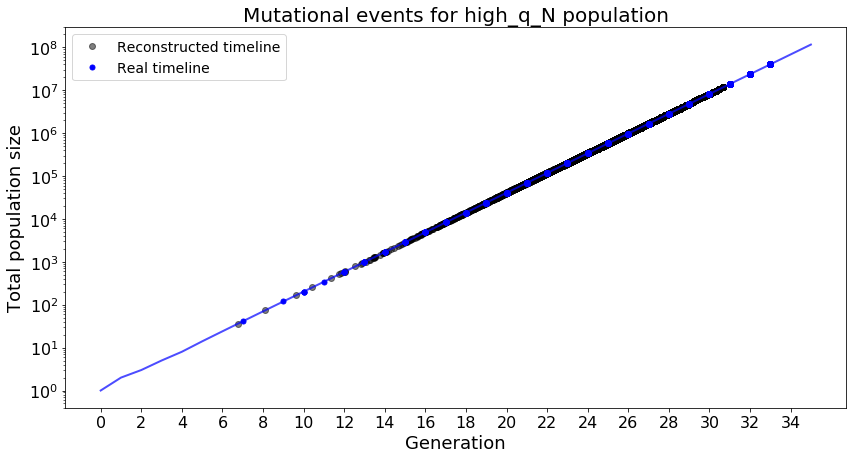

In [31]:
plt.plot(high_q_N_rec_t, high_q_N_rec_popsizes, marker='o', markersize=6, color='k', alpha=0.5,
         linestyle='none', label='Reconstructed timeline');
plt.plot(high_q_N.size_vec, color='b', alpha=0.7);
plt.plot(high_q_N_real_t, high_q_N_real_popsizes, marker='o', markersize=5, color='b', 
         linestyle='none', label='Real timeline');
plt.xlabel('Generation');
plt.ylabel('Total population size');
plt.legend(loc="upper left");
plt.title('Mutational events for high_q_N population');
plt.xticks(range(0, high_q_N.gen+1, 2));
plt.yscale('log');
plt.savefig("./Figures/Large-Start_mut_rate/high_q_N-Rec_mut_timeline.png");
plt.show()

### High_q Selection

In [32]:
high_q_S_mutations = high_q_S_data.iloc[1:].loc[high_q_S_data['Family size'] >= 10]
high_q_S_real_t = high_q_S.gen - high_q_S_mutations['Age'].values
high_q_S_real_popsizes = list(high_q_S.size_vec[i] for i in high_q_S_real_t)

high_q_S_rec_t, high_q_S_rec_popsizes = reconstruct_mutational_timeline(high_q_S, det_lim = 10)

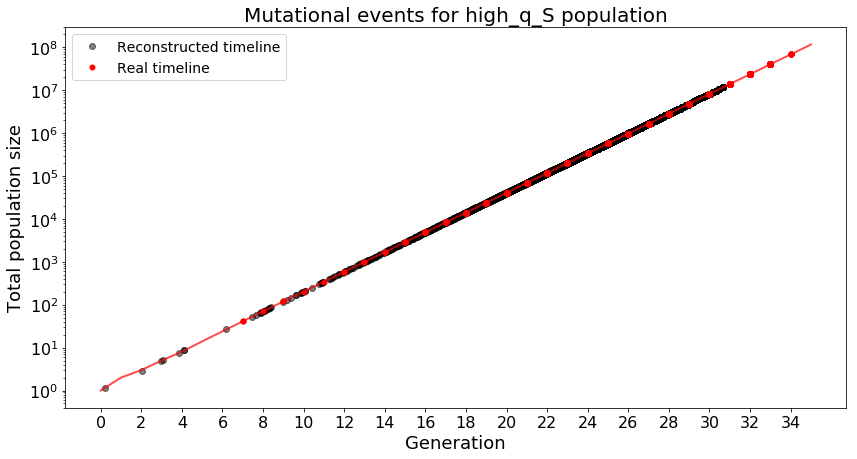

In [33]:
plt.plot(high_q_S_rec_t, high_q_S_rec_popsizes, marker='o', markersize=6, color='k', alpha=0.5,
         linestyle='none', label='Reconstructed timeline');
plt.plot(high_q_S.size_vec, color='r', alpha=0.7);
plt.plot(high_q_S_real_t, high_q_S_real_popsizes, marker='o', markersize=5, color='r', 
         linestyle='none', label='Real timeline');
plt.xlabel('Generation');
plt.ylabel('Total population size');
plt.legend(loc="upper left");
plt.title('Mutational events for high_q_S population');
plt.xticks(range(0, high_q_S.gen+1, 2));
plt.yscale('log');
plt.savefig("./Figures/Large-Start_mut_rate/high_q_S-Rec_mut_timeline.png");
plt.show()